# Arquitetura VGG16

A arquitetura do modelo VGG16 é uma das mais populares e influentes arquiteturas de redes neurais convolucionais (CNNs) utilizadas na área de visão computacional. Ela foi proposta por Karen Simonyan e Andrew Zisserman do Visual Geometry Group (VGG) da Universidade de Oxford.
Introdução

A principal característica da arquitetura VGG16 é a sua profundidade, com um total de 16 camadas. Essa profundidade é uma das razões para o desempenho notável do modelo em tarefas de classificação de imagens. O modelo é treinado em um grande conjunto de dados chamado ImageNet, que contém milhões de imagens em 1000 categorias diferentes.
Arquitetura

A arquitetura do VGG16 é composta por várias camadas convolucionais e camadas totalmente conectadas. A seguir, vamos entender as principais partes da arquitetura:

![Vgg16](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*NNifzsJ7tD2kAfBXt3AzEg.png)

Camadas Convolucionais

O modelo VGG16 começa com uma sequência de camadas convolucionais. Essas camadas convolucionais têm filtros pequenos (geralmente 3x3) e stride fixo de 1 pixel. A escolha de filtros menores e stride 1 permite que o modelo capture informações finas nas imagens.

As camadas convolucionais são empilhadas uma após a outra, e o número de filtros é aumentado à medida que avançamos na arquitetura. O modelo tem um total de 13 camadas convolucionais, agrupadas em conjuntos de duas ou três camadas.
Camadas de Pooling

Após cada conjunto de camadas convolucionais, uma camada de pooling é adicionada. O pooling é uma operação que reduz a dimensionalidade dos recursos, ajudando a reduzir a quantidade de parâmetros do modelo e evitar o overfitting. O VGG16 usa max pooling com um filtro de tamanho 2x2 e um stride de 2 pixels.
Camadas Densas

Após as camadas convolucionais e de pooling, o modelo termina com camadas totalmente conectadas (densas). Essas camadas transformam os recursos extraídos das imagens em uma representação adequada para a classificação.

No caso do VGG16, existem três camadas densas com 4096 unidades cada. Essas camadas são ativadas pela função de ativação ReLU, que ajuda a introduzir não-linearidade no modelo.
Camada de Saída

A camada de saída do VGG16 é uma camada densa com 1000 unidades, correspondendo ao número de classes no conjunto de dados ImageNet. A função de ativação Softmax é aplicada à camada de saída para obter probabilidades de classificação para cada classe.
Resumo

A arquitetura do modelo VGG16 é caracterizada por sua profundidade e sequência de camadas convolucionais, camadas de pooling e camadas densas. A combinação dessas camadas resulta em um modelo poderoso para classificação de imagens, capaz de aprender recursos discriminativos complexos.

Ao compreender a arquitetura do VGG16, podemos apreciar como o modelo extrai informações valiosas das imagens e as utiliza para realizar tarefas como reconhecimento de objetos, segmentação de imagens e muito mais.

# Dataset - Insects Recognition

Conjunto de dados de imagem para reconhecimento de insetos.

Existem 5 diretórios neste conjunto de dados para diferentes tipos de insetos.  Cada diretório contém quase 1.000 imagens de um determinado tipo de inseto.


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!chmod 600 /content/kaggle.json


!kaggle datasets download -d hammaadali/insects-recognition
!unzip /content/insects-recognition.zip -d /content/kaggle/

 94% 65.0M/69.0M [00:02<00:00, 38.7MB/s]
100% 69.0M/69.0M [00:02<00:00, 33.0MB/s]
Archive:  /content/insects-recognition.zip
  inflating: /content/kaggle/Butterfly/google0.jpg  
  inflating: /content/kaggle/Butterfly/google1.jpg  
  inflating: /content/kaggle/Butterfly/google10.jpg  
  inflating: /content/kaggle/Butterfly/google100.jpg  
  inflating: /content/kaggle/Butterfly/google101.jpg  
  inflating: /content/kaggle/Butterfly/google102.jpg  
  inflating: /content/kaggle/Butterfly/google103.jpg  
  inflating: /content/kaggle/Butterfly/google104.jpg  
  inflating: /content/kaggle/Butterfly/google105.jpg  
  inflating: /content/kaggle/Butterfly/google107.jpg  
  inflating: /content/kaggle/Butterfly/google109.jpg  
  inflating: /content/kaggle/Butterfly/google11.jpg  
  inflating: /content/kaggle/Butterfly/google110.jpg  
  inflating: /content/kaggle/Butterfly/google111.jpg  
  inflating: /content/kaggle/Butterfly/google112.jpg  
  inflating: /content/kaggle/Butterfly/google113.jpg  
 

In [ ]:
!pip install watermark tensorflow==2.13.0 matplotlib==3.7.1 numpy==1.23.5 opencv-python==4.8.0 watermark sklearn==1.2.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
tf.keras.backend.clear_session()

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Version 0" --iversions

In [ ]:

path  =  os.path.join("kaggle")

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(path,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              subset='training')

val_gen = train_datagen.flow_from_directory(path,
                                            target_size=(224, 224),
                                            class_mode='categorical',
                                            subset='validation')

Found 3561 images belonging to 5 classes.
Found 888 images belonging to 5 classes.


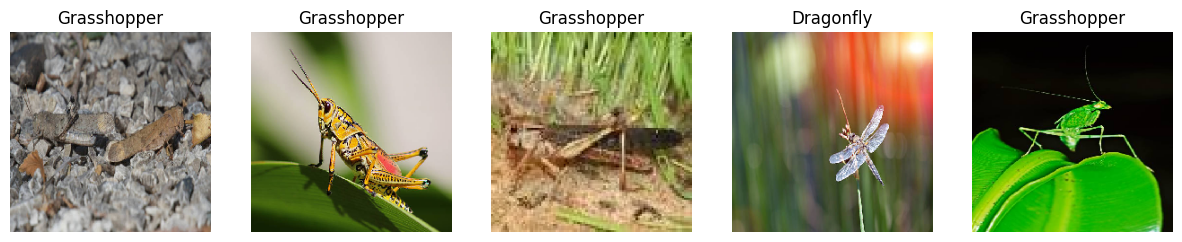

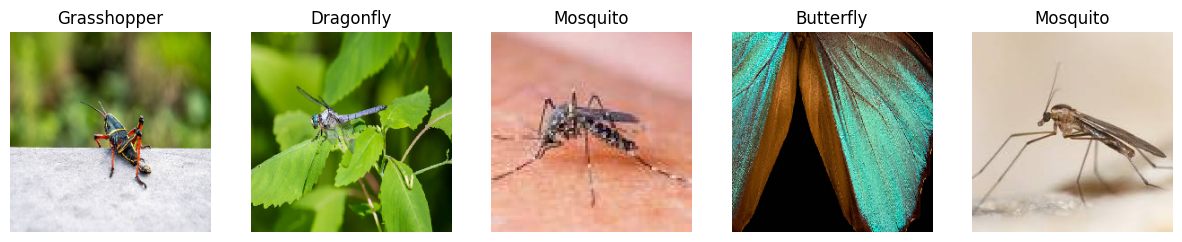

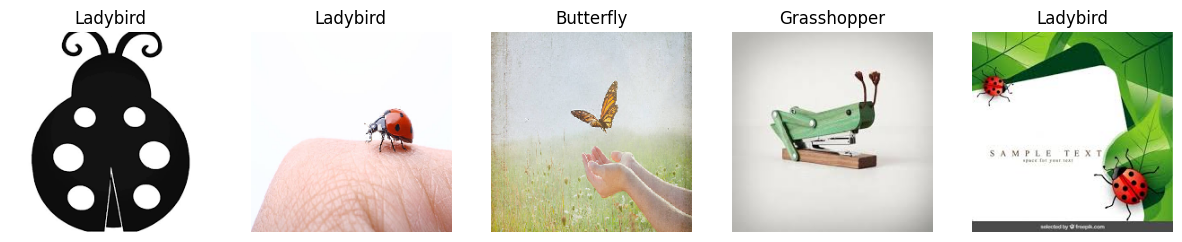

In [ ]:
labels = ['Butterfly', 'Dragonfly', 'Grasshopper', 'Ladybird', 'Mosquito']
n_classes = len(labels)
for i in range(15):
    if i%5==0:
        fig, ax = plt.subplots(ncols=5, figsize=(15,15))
    img, lbl = train_gen.next()
    ax[i%5].imshow(img[2])
    ax[i%5].set_title(labels[np.argmax(lbl[2])])
    ax[i%5].grid(False)
    ax[i%5].axis(False)

In [ ]:
# Definir a arquitetura da VGG16
model = Sequential()

# Bloco 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Bloco 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Bloco 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Bloco 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Bloco 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Camada densa
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
epochs = 10

history = model.fit(train_gen,
                    batch_size=64,
                    validation_data=val_gen,
                    epochs=epochs)



Epoch 1/10
112/112 [==============================] - 81s 492ms/step - loss: 1.6520 - accuracy: 0.2241 - val_loss: 1.6013 - val_accuracy: 0.2331
Epoch 2/10
112/112 [==============================] - 48s 432ms/step - loss: 1.6015 - accuracy: 0.2328 - val_loss: 1.6020 - val_accuracy: 0.2331
Epoch 3/10
112/112 [==============================] - 48s 426ms/step - loss: 1.6023 - accuracy: 0.2286 - val_loss: 1.6008 - val_accuracy: 0.2331
Epoch 4/10
112/112 [==============================] - 48s 428ms/step - loss: 1.6017 - accuracy: 0.2328 - val_loss: 1.6009 - val_accuracy: 0.2331
Epoch 5/10
112/112 [==============================] - 49s 432ms/step - loss: 1.6020 - accuracy: 0.2328 - val_loss: 1.6009 - val_accuracy: 0.2331
Epoch 6/10
112/112 [==============================] - 48s 425ms/step - loss: 1.6021 - accuracy: 0.2328 - val_loss: 1.6011 - val_accuracy: 0.2331
Epoch 7/10
112/112 [==============================] - 48s 428ms/step - loss: 1.6022 - accuracy: 0.2328 - val_loss: 1.6008 - val_ac

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
Y_pred = model.predict(val_gen, len(val_gen))

y_pred = np.argmax(Y_pred, axis=1)
y_true = val_gen.classes



class_names = list(val_gen.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=class_names))

# Para Casa:

Tente melhorar o modelo VGG16 apresentado nesse lab.